## Reference
- __[GeeksforGeeks: Snake Game](https://www.geeksforgeeks.org/snake-game-in-python-using-pygame-module/)__

In [24]:
# importing libraries
import pygame
import time
import random

# Window size
window_x = 720
window_y = 480

# Colors
black = pygame.Color(0, 0, 0)
white = pygame.Color(255, 255, 255)
red   = pygame.Color(255, 0, 0)
green = pygame.Color(0, 255, 0)
blue  = pygame.Color(0, 0, 255)

# Initialising pygame
pygame.init()
pygame.display.set_caption('Snakes Game')
game_window = pygame.display.set_mode((window_x, window_y))

# FPS (frames per second) controller
fps          = pygame.time.Clock()
refresh_rate = 15

# Fruit 
fruit_position = [random.randrange(1, (window_x//10)) * 10,
                  random.randrange(1, (window_y//10)) * 10]

# Snake
snake_head = [100 , 50]
snake_body = [[100, 50],
              [90 , 50],
              [80 , 50],
              [70 , 50]]
direction  = 'RIGHT'
change_to  = direction

# Score function
score = 0
def show_score(color):
    pygame.font.init()
    score_font    = pygame.font.SysFont('timesnewroman', 20)
    score_surface = score_font.render('Score : ' + str(score), True, color)
    score_rect    = score_surface.get_rect()
    game_window.blit(score_surface, score_rect)
    pygame.display.flip()

# Game over function
def game_over():
    pygame.font.init()
    my_font               = pygame.font.SysFont('timesnewroman', 50)
    game_over_surface     = my_font.render('GAME OVER! Your Score is : ' + str(score), True, red)
    game_over_rect        = game_over_surface.get_rect()
    game_over_rect.midtop = (window_x/2, window_y/4)
    game_window.blit(game_over_surface, game_over_rect)
    pygame.display.flip()
    time.sleep(2)

# Main Function
running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        if event.type == pygame.KEYDOWN:
            if event.key == pygame.K_UP:
                change_to = 'UP'
            if event.key == pygame.K_DOWN:
                change_to = 'DOWN'
            if event.key == pygame.K_LEFT:
                change_to = 'LEFT'
            if event.key == pygame.K_RIGHT:
                change_to = 'RIGHT'

    # Prevent the snakes from moving in the opposite direction simulataneously
    if change_to == 'UP' and direction != 'DOWN':
        direction = 'UP'
    if change_to == 'DOWN' and direction != 'UP':
        direction = 'DOWN'
    if change_to == 'LEFT' and direction != 'RIGHT':
        direction = 'LEFT'
    if change_to == 'RIGHT' and direction != 'LEFT':
        direction = 'RIGHT'

    # Moving the snake
    if direction == 'UP':
        snake_head[1] -= 10
    if direction == 'DOWN':
        snake_head[1] += 10
    if direction == 'LEFT':
        snake_head[0] -= 10
    if direction == 'RIGHT':
        snake_head[0] += 10
    snake_body.insert(0, list(snake_head))

    # If snake & fruit collides: 
    #                            > increment score by 10, 
    #                            > grow snake body by not "popping" from snake_body,
    #                            > respawn fruit
    if snake_head[0] == fruit_position[0] and snake_head[1] == fruit_position[1]:
        score += 10
        fruit_position = [random.randrange(1, (window_x//10)) * 10, 
                          random.randrange(1, (window_y//10)) * 10]
    else:
        snake_body.pop()

    # Window background
    game_window.fill(black)

    # Draw snake & fruit
    for pos in snake_body:
        pygame.draw.rect(game_window, green, pygame.Rect(pos[0], pos[1], 10, 10))
    pygame.draw.rect(game_window, white, pygame.Rect(fruit_position[0], fruit_position[1], 10, 10))

    # Displaying score continuously
    show_score(white)

    # Refresh game screen
    pygame.display.update()

    # Refresh Rate
    fps.tick(refresh_rate)
    
    # Game Over conditions: Snake's head out of screen's bound
    if snake_head[0] < 0 or snake_head[0] > window_x-10:
        game_over()
        running = False
    if snake_head[1] < 0 or snake_head[1] > window_y-10:
        game_over()
        running = False
    
    # Game Over conditions: Snake's head touching its own body
    for block in snake_body[1:]:
        if snake_head[0] == block[0] and snake_head[1] == block[1]:
            game_over()
            running = False
    
# Quit pygame
pygame.quit()

## Output
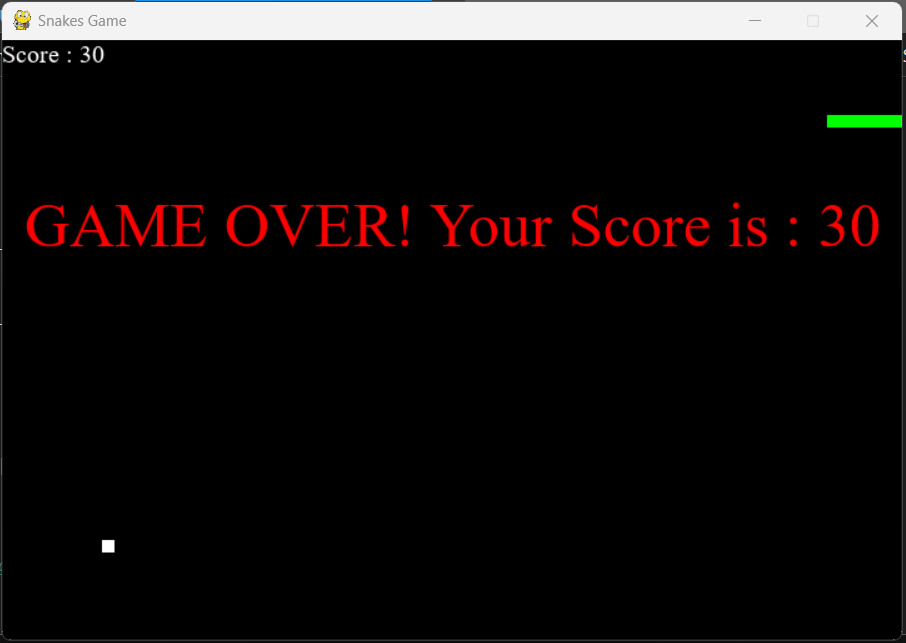